## Observations and Insights 

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [112]:
# Checking the number of mice.
unique = combined_study_data["Mouse ID"].nunique()
unique

249

In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupicate_data = combined_study_data[combined_study_data.duplicated()]
dupicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [114]:
# Optional: Get all the data for the duplicate mouse ID. 
dupicate_data_mouse_ID = combined_study_data[combined_study_data.duplicated(['Mouse ID'])]
dupicate_data_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_study_data.drop_duplicates(subset="Mouse ID", keep='first', inplace=False, ignore_index=False)
clean_df

In [115]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

249

## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mean = combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd = combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": sd, "SEM": sem})

#Formatting
summary_df["Mean"] = summary_df["Mean"].map("{:.2f}".format)
summary_df["Median"] = summary_df["Median"].map("{:.2f}".format)
summary_df["Variance"] = summary_df["Variance"].map("{:.2f}".format)
summary_df["Standard Deviation"] = summary_df["Standard Deviation"].map("{:.2f}".format)
summary_df["SEM"] = summary_df["SEM"].map("{:.2f}".format)

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

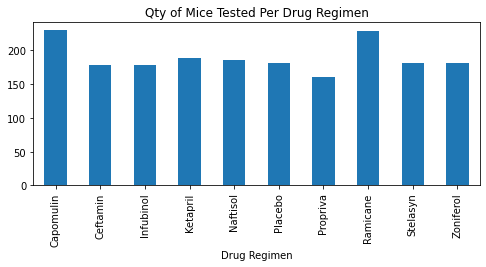

<Figure size 432x288 with 0 Axes>

In [118]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

groupby_drug_regimen = combined_study_data[["Mouse ID", "Drug Regimen"]].groupby("Drug Regimen")

qty_mouse = groupby_drug_regimen["Mouse ID"].count()

# use DataFrame.plot() in order to create a nar chart of the data

qty_mouse.plot(kind="bar", figsize=(8,3))
plt.title("Qty of Mice Tested Per Drug Regimen")


plt.show()
plt.tight_layout()

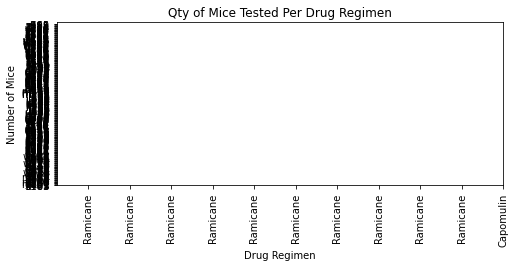

In [121]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen = combined_study_data["Drug Regimen"].tolist()
mouse_count = combined_study_data["Mouse ID"].tolist()

# Set x_axis and tick locations
x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]

# Create a list
plt.figure(figsize=(8,3))
plt.bar(x_axis, mouse_count, color="green", alpha=0.6, align="center")
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

# Create a title for chart and X axis and y axis
plt.title("Qty of Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# set the limits
plt.xlim(-0.75, 10)
plt.ylim(0, 250)

plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
